In [1]:
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/datasets/titanic.zip')

In [3]:
lis = [f'zero.{n}' for n in range(1,19)]
lis.append('zero')

In [4]:
df.drop(lis, axis=1, inplace=True)

In [5]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


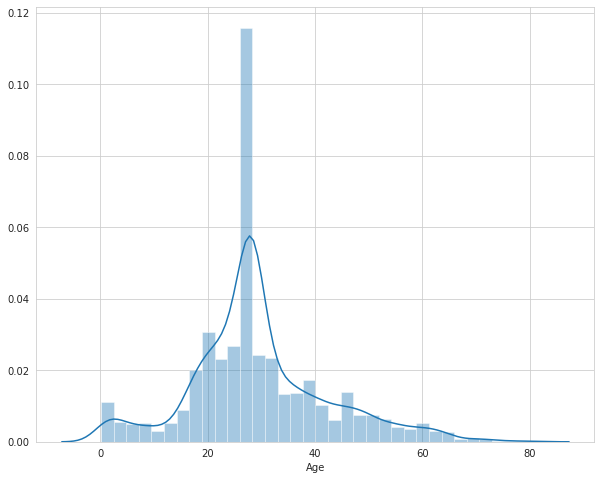

In [6]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.distplot(df['Age'])

In [7]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')

In [8]:
CATEGORICAL_COLUMNS = ['Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked']
NUMERIC_COLUMNS = ['Age', 'Fare']

In [9]:
df.dropna(inplace=True)

In [10]:
df['Embarked'] = df.apply(lambda x: int(x['Embarked']), axis=1)

In [17]:
feat_col = []
for feat_name in CATEGORICAL_COLUMNS:
  vocab = df[feat_name].unique()
  feat_col.append(tf.feature_column.categorical_column_with_vocabulary_list(feat_name, vocab))

for feature_name in NUMERIC_COLUMNS:
  feat_col.append(tf.feature_column.numeric_column(feature_name, dtype= tf.float32))

In [18]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [24]:
X = df.drop('2urvived', axis=1)
y = df['2urvived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [26]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf39gpsg3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)

In [30]:
print(result['accuracy'])

0.7361111
